In [1]:
import sys
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import re

plt.style.use('seaborn-v0_8-bright')

# from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

#If your computer is going low on RAM, commment the line above and use this instead:
sys.path.append('../')
from minisdk.core import EcephysProjectCache

Loading the necessary data.

In [3]:
# data_dir = "./allendata"
#Again, we might want to use another folder if we do want to overwrite potential data we have
data_dir = "../converted"

#From here on everything works with both AllenSDK and the MiniSDK!
manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

#Grab our (filtered) data from our favorite session. We take a female mice with nice unit count
session_id = 798911424 
oursession = cache.get_session_data(session_id)#, timeout=3000)

#Takes around 500 MB of disk space, a bit more once is decompressed in RAM
from minisdk.core import Allen2MiniConverter
converter = Allen2MiniConverter()
converter.write_metadata_csv(cache)
converter.write_session_data(oursession)

/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [13]:
# Stimulus names
sti_table = oursession.get_stimulus_table()
sti_names = set(sti_table.stimulus_name)    
print(sti_names)

{'flashes', 'spontaneous', 'drifting_gratings', 'natural_movie_one', 'natural_scenes', 'gabors', 'static_gratings', 'drifting_gratings_contrast', 'natural_movie_three'}


/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [17]:
for name in sti_names:
    print(f'There are {(sti_table["stimulus_name"] == name).sum()} stimuli with {name}')

There are 150 stimuli with flashes
There are 16 stimuli with spontaneous
There are 630 stimuli with drifting_gratings
There are 18000 stimuli with natural_movie_one
There are 5950 stimuli with natural_scenes
There are 3645 stimuli with gabors
There are 6000 stimuli with static_gratings
There are 540 stimuli with drifting_gratings_contrast
There are 36000 stimuli with natural_movie_three


In [22]:
mask = (sti_table['stimulus_name'] == 'natural_scenes')
natural_scenes = sti_table[mask]
del mask
natural_scenes.head()

,stimulus_block,start_time,stop_time,spatial_frequency,frame,y_position,x_position,color,phase,stimulus_name,temporal_frequency,contrast,size,orientation,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
51355,9.0,5909.794447,5910.044666,NaN,13.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250219,4908
51356,9.0,5910.044666,5910.294885,NaN,38.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250219,4909
51357,9.0,5910.294885,5910.545104,NaN,30.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250219,4910
51358,9.0,5910.545104,5910.795324,NaN,35.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250219,4911
51359,9.0,5910.795324,5911.045522,NaN,112.0,NaN,NaN,NaN,NaN,natural_scenes,NaN,NaN,NaN,NaN,0.250198,4912


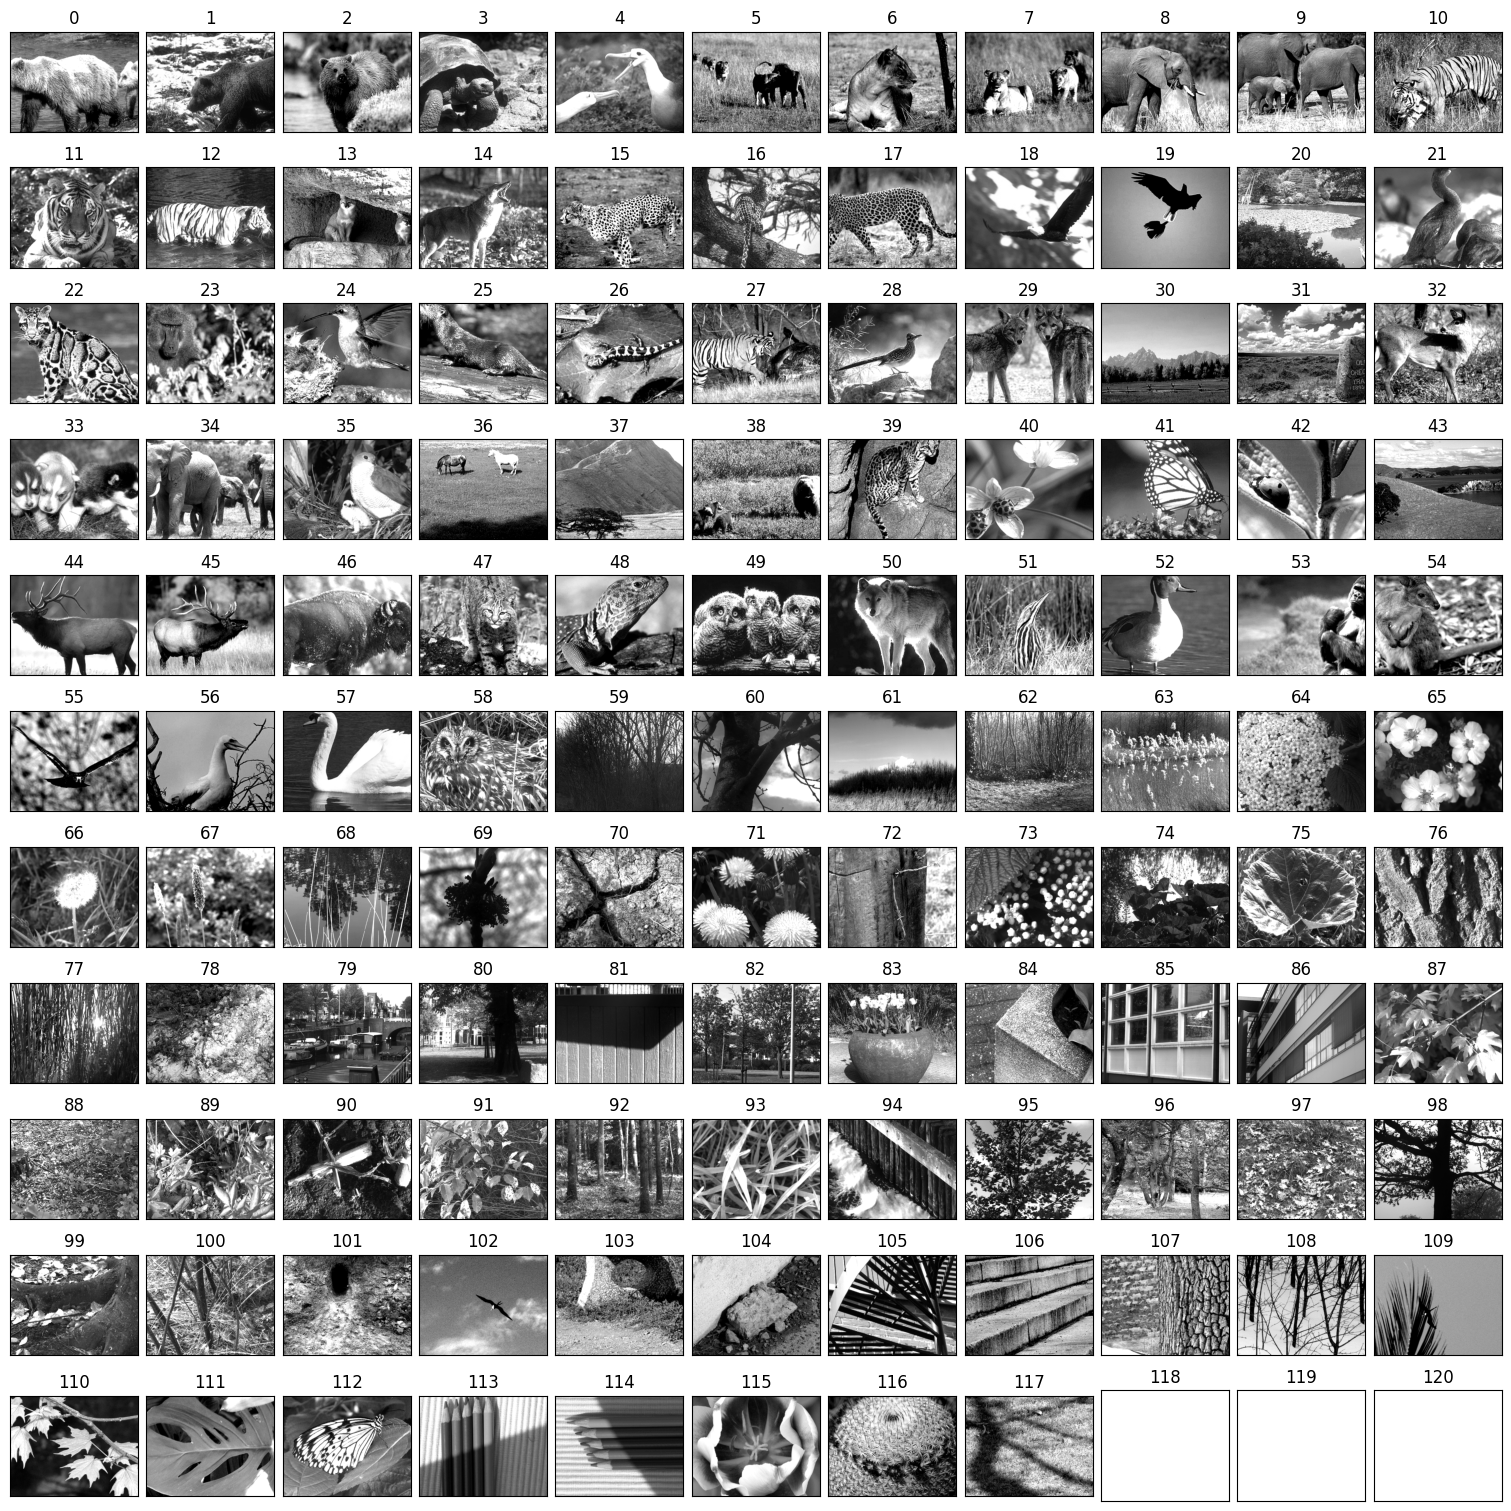

In [23]:
#Download the 118 photos of the natural scenes. 
#First time they need to be downloaded.
nphotos = 118
for i in range(nphotos):
    tmp = cache.get_natural_scene_template(i)
del tmp

#Convert them to use with the MiniSDK if needed
#converter.write_natural_images()
#Let's create a beautiful 11x11 reference plot with all the images
fig, axes = plt.subplots(ncols=11, nrows=11, figsize=(15,15), layout="constrained")
L = 11
for x in range(L):
    for y in range(L):
        index = y + x*L 
        axes[x,y].set_title(index)
        axes[x,y].set_xticks([])
        axes[x,y].set_yticks([])
        if index < 118:
            axes[x,y].imshow(cache.get_natural_scene_template(index), cmap="gray")

plt.savefig("natural_scenes.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [32]:
#Get the ids of the images and the units 
image_ids = oursession.get_stimulus_table("natural_scenes").index.values
visam_ids = oursession.units[oursession.units["ecephys_structure_acronym"]=="VISam"].index.values

print(f'We have {image_ids.shape[0]} images and {visam_ids.shape[0]} units')

We have 5950 images and 135 units


/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [39]:
image_ids

array([51355, 51356, 51357, ..., 68226, 68227, 68228])

In [46]:
natural_scenes.loc[51355]

stimulus_block                      9.0
start_time                  5909.794447
stop_time                   5910.044666
spatial_frequency                   NaN
frame                              13.0
y_position                          NaN
x_position                          NaN
color                               NaN
phase                               NaN
stimulus_name            natural_scenes
temporal_frequency                  NaN
contrast                            NaN
size                                NaN
orientation                         NaN
duration                       0.250219
stimulus_condition_id              4908
Name: 51355, dtype: object

In [58]:
def get_n_spikes_in_time_interval(session, regionstr, time_start, time_end):
    #Filter neurons in the desired region
    #IDs of these neuron are set as the indices of the units table
    region_ids = session.units[session.units["ecephys_structure_acronym"]==regionstr].index.values

    #Get the spike times as a list of numpy arrays instead of dictionary
    #spike_times[id] is a numpy array
    region_spikes = {}
    for id in region_ids:
        #Filter spikes in the interval (time_start, time_end) ms.
        #A single neuron can have 20000 spikes, and eventplot would struggle
        spikes = session.spike_times[id]
        region_spikes[id] = len(spikes[(spikes > time_start) & (spikes < time_end)])

    return region_spikes


In [118]:
# TODO: Optimize using pandas methods
def get_spike_vectors(session, delay : float, stimuli : pd.DataFrame, regionstr : str):
    """Should return a DataFrame where each line corresponds to a vector of 
    spike numbers for each unit. Could be optimized!"""
    sti_ids = stimuli.index.values
    rows = []
    for sti_id in sti_ids:
        stimulus = stimuli.loc[sti_id]
        region_spikes = get_n_spikes_in_time_interval(session, 
                                                      regionstr, 
                                                      stimulus.start_time + delay, 
                                                      stimulus.stop_time + delay)
        new_row = pd.DataFrame(region_spikes, index = [sti_id])
        rows.append(new_row)
    spike_vectors = pd.concat(rows)
    return spike_vectors

In [91]:
spike_vectors = get_spike_vectors(oursession, 0.25, natural_scenes, "VISam")

In [92]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [120]:
def experiment_with_delay(delay : float, stimuli):
    spike_vectors = get_spike_vectors(oursession, delay, stimuli, "VISam") # right now only works with VISam
    
    #Find the frame that corresponds to the presentation id and convert it to int numpy array.
    targets = stimuli.loc[image_ids, "frame"] # right now works only with natural_scenes!
    targets = targets.values.astype(int)
    labels = np.unique(targets)  #There should be 118 labels, one per image.

    #The codification of the images, as a 2D numpy array instead 
    spikes_presentation = spike_vectors.values.astype(float)

    #Initialize the vectors
    accuracies = []
    confusions = []

    #KFold.split automatically splits our big table into n_splits parts. Training then is done with n_splits-1 
    #parts and the remaining one is used for test. The procedure then is cross-validated.
    for train_indices, test_indices in KFold(n_splits=5).split(spikes_presentation):
        
        #Generate the Support Vector Machine and fit it using the training dataset
        clf = svm.SVC(gamma="scale", kernel="rbf")
        clf.fit(spikes_presentation[train_indices], targets[train_indices])
        
        #Get the test set and try to predict over it
        test_targets = targets[test_indices]
        test_predictions = clf.predict(spikes_presentation[test_indices])
        
        #Compute the accuracy on this test set and save all of them
        accuracy = 1 - (np.count_nonzero(test_predictions - test_targets) / test_predictions.size)
        
        accuracies.append(accuracy)
        confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=labels))

    # #Get the mean!
    print(f"Cross-validated mean accuracy: {100*np.mean(accuracy):.1f}%")
    print(f"Ch?ance of random guess: {100/labels.size:.2f}%") #1/118 
    return 100*np.mean(accuracy)

In [121]:
experiment_with_delay(0.0, natural_scenes)

Cross-validated mean accuracy: 17.6%
Ch?ance of random guess: 0.84%


17.647058823529417

In [109]:
delays = np.arange(0.25, 0.50, 0.05)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, natural_scenes))

Cross-validated mean accuracy: 4.1%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.6%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 0.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 0.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 0.5%
Ch?ance of random guess: 0.84%


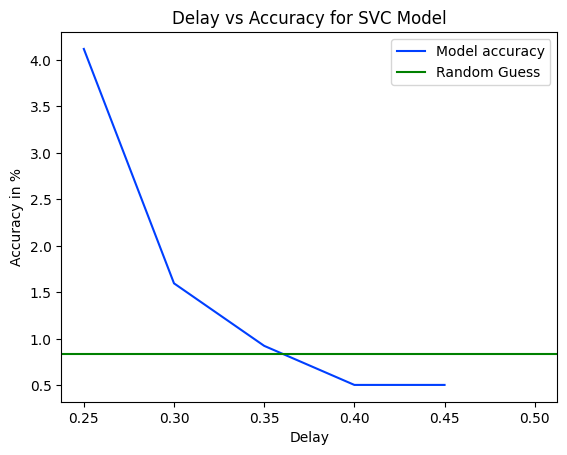

In [117]:
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model')
plt.plot(delays, accuracies, label = 'Model accuracy')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.legend()
plt.show()